# A/B testing
a tool that allows you to test two or more different ideas against each other in the real world, and to see which one empirically performs better. <br>



empirically -> by means of observation or experience rather than theory or pure logic.<br>
There is no guessing. You get to know which idea is better under the conditions that matter most <br>
- It can provide accurate answers quickly, allowing companies to rapidly iterate on ideas.
- At its core, it is one of the only statistically sound ways to establish <b> causal relationships<b>.
    
A/B tests are run to improve Key Performance Indicators or KPIs.

# Key Performance Indicators - KPIs. 
How to identify and define meaningful KPIs through a combination of critical thinking and leveraging Python tools. 

- For a drug company these may be remission rates of a cancer, or the likelihood of a particular side-effect.
- For a mobile game, it may be something like revenue, or play time per user.
- For an App Conversion Rate KPI Percentage of users who subscribe aer the free trial.

### Identifying the right KPIs requires a combination of

- experience, domain knowledge:tell you what is likely to be an important driver of the business

- exploratory data analysis: allows you to uncover relationships that reveal which metrics truly measure these drivers.

In [1]:
import pandas as pd

In [2]:
customer_data = pd.read_csv('./data/ABTesting/customer.csv')
customer_data.columns

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')

In [3]:
app_purchases = pd.read_csv('./data/ABTesting/inappParchuase.csv')
app_purchases.columns

Index(['date', 'uid', 'sku', 'price'], dtype='object')

In [4]:
purchase_data = app_purchases.merge(customer_data, on=['uid'], how='inner')
purchase_data = purchase_data.rename(columns = {'date': 'purchase_date'})
purchase_data.head()

,purchase_date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17
1,2017-07-15,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17
2,2017-11-12,41195147,sku_four_599,599,2017-06-26T00:00:00Z,and,M,BRA,17
3,2017-09-26,91591874,sku_two_299,299,2017-01-05T00:00:00Z,and,M,TUR,17
4,2017-12-01,91591874,sku_four_599,599,2017-01-05T00:00:00Z,and,M,TUR,17


## Practicing aggregations


In [5]:
purchase_data.price.agg(['mean', 'median'])

mean      406.772596
median    299.000000
Name: price, dtype: float64

In [6]:
purchase_data.agg({'price': ['mean', 'median'], 
                   'age':   ['mean', 'median'] })

,price,age
mean,406.772596,23.922274
median,299.000000,21.000000


In [7]:
grouped_purchase_data = purchase_data.groupby( by=['device', 'gender'])
grouped_purchase_data

In [8]:
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median']})
purchase_summary

price       
                     mean median
device gender                   
and    F       400.747504  299.0
       M       416.237308  499.0
iOS    F       404.435330  299.0
       M       405.272401  299.0

## Calculating KPIs
The average amount of price paid per purchase within a user's first 28 days 

### Suppose today is : Timestamp('2018-03-17 00:00:00')
There is Registerations done today in our purchase_data, and to calculate such KPI it needs only users spends at least 28 day after thier Registerations. <br>
<b> some or most KPIs needs patience like this.<b>

In [9]:
max(purchase_data['reg_date'])  # '2018-03-17T00:00:00Z' is today :D

'2018-03-17T00:00:00Z'

In [10]:
purchase_data.reg_date      = purchase_data.reg_date.astype('datetime64[ns]')
purchase_data.purchase_date = pd.to_datetime(purchase_data.purchase_date)

In [11]:
from datetime import timedelta # enable traveling in time

In [12]:
today = pd.to_datetime('2018-03-17 00:00:00')
max_reg_date = today - timedelta(days=28)
max_reg_date

Timestamp('2018-02-17 00:00:00')

In [13]:
# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data [purchase_data.reg_date < max_reg_date] 

In [14]:
# Filter to contain only purchases within the first 28 days of registration 
purchase_data_filt = purchase_data_filt[ purchase_data_filt.purchase_date <=  purchase_data_filt.reg_date + timedelta(days=28) ]

In [15]:
purchase_data_filt.head()

,purchase_date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17
19,2016-05-12,22870987,sku_four_599,599,2016-04-20,iOS,F,BRA,26
34,2017-01-12,88736154,sku_five_899,899,2017-01-08,and,F,BRA,19
92,2016-12-08,45588501,sku_four_599,599,2016-11-27,and,F,USA,49


In [16]:
# our First KPI: 
purchase_data_filt.price.mean()  # price is in Cents

414.4237288135593

### Comment on How Filteration is Done
<b> first <b> we ignore all people have registered upon last 28 day from today
purchase_data.reg_date < max_reg_date.>
<b>second<b> and more tricky, we only needs users who did purchases from whatever thier reg_date is + 28 days
people from the first filter who did purchases after 29 day, we do not need them included!

## Reflect Those Prices made in month1 for each user in the Original Dataset

In [17]:
import numpy as np
condition = ( purchase_data.reg_date < max_reg_date ) & ( purchase_data.purchase_date <=  purchase_data.reg_date + timedelta(days=28)  )
purchase_data['month1'] = np.where( condition,  purchase_data.price, pd.NA)
purchase_data.head()

,purchase_date,uid,sku,price,reg_date,device,gender,country,age,month1
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,499
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,499
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,<NA>
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,<NA>
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,<NA>


In [18]:
purchase_data_per_user = purchase_data.groupby(by=['uid'], as_index=False)
purchase_data_per_user_agg = purchase_data_per_user.agg({'month1': ['sum']})
# 
purchase_data_per_user_agg[purchase_data_per_user_agg['uid'] == 41195147]

,uid,month1
,,sum
429,41195147,998


## Average purchase price by cohort
calculate these metrics across a set of cohorts and see what differences emerge. This is a useful task as it can help us understand <b>how behaviors vary<b> across cohorts.

In [19]:
purchase_data_grouped = purchase_data.groupby(by=['gender', 'device'], as_index=False)
purchase_data_grouped

In [20]:
purchase_summary = purchase_data_grouped.agg( {'month1': ['mean', 'median'], 'price': ['mean', 'median']} )
purchase_summary

gender device      month1              price       
                       mean median        mean median
0      F    and  387.826816  299.0  400.747504  299.0
1      F    iOS  435.567164  499.0  404.435330  299.0
2      M    and  413.534884  399.0  416.237308  499.0
3      M    iOS  434.238095  499.0  405.272401  299.0

## How to visualize, manipulate, and explore KPIs as they change over time.

## Parsing dates
https://strftime.org/

In [21]:
dates1 = ['Saturday January 27, 2017', 'Saturday December 2, 2017']
pd.to_datetime(dates1, format="%A %B %d, %Y")

DatetimeIndex(['2017-01-27', '2017-12-02'], dtype='datetime64[ns]', freq=None)

In [22]:
dates2 = ['2017-01-01', '2016-05-03']
pd.to_datetime(dates2, format= "%Y-%m-%d")

DatetimeIndex(['2017-01-01', '2016-05-03'], dtype='datetime64[ns]', freq=None)

In [23]:
dates3 = ['08/17/1978', '01/07/1976']
pd.to_datetime(dates3, format= "%m/%d/%Y")

DatetimeIndex(['1978-08-17', '1976-01-07'], dtype='datetime64[ns]', freq=None)

In [24]:
dates4 = ['2016 March 01 01:56', '2016 January 4 02:16']
pd.to_datetime(dates4, format= "%Y %B %d %H:%M")

DatetimeIndex(['2016-03-01 01:56:00', '2016-01-04 02:16:00'], dtype='datetime64[ns]', freq=None)

# BAD!!
## Plotting time series data

In [ ]:
purchase_data['diff_days'] = (purchase_data['purchase_date'] - purchase_data['reg_date']) / np.timedelta64(1, 'D')
purchase_data.head()

In [ ]:
condition = purchase_data.diff_days <= 7.0
purchase_data['first_week_purchases'] = np.where(condition, 1, 0)
purchase_data.head()

In [ ]:
purchase_data_grouped = purchase_data.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})
purchase_data_grouped.head()

### Comment
very usefule to un complicate those grouping and return it to a flat DataFrame

In [ ]:
# Remember to ONLY ONE run This Cell since The Object is Mutated!
purchase_data_grouped.columns = purchase_data_grouped.columns.droplevel(level=1)
purchase_data_grouped.reset_index(inplace=True)
purchase_data_grouped.head()

In [ ]:
purchase_data_grouped.tail()

In [ ]:
purchase_data_double_grouped = purchase_data_grouped.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})

purchase_data_double_grouped.columns = purchase_data_double_grouped.columns.droplevel(level=1)
purchase_data_double_grouped.reset_index(inplace=True)

In [ ]:
purchase_data_double_grouped.head()
# purchase_data_double_grouped.max()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
purchase_data_double_grouped.plot(x='reg_date', y='first_week_purchases')
plt.show()

## Pivoting The Data

In [ ]:
user_purchases_country = purchase_data.groupby(by=['reg_date', 'country']).agg({'first_week_purchases': ['mean']})
user_purchases_country.columns = user_purchases_country.columns.droplevel(level=1)
user_purchases_country.reset_index(inplace=True)
user_purchases_country.tail(6)

In [ ]:
country_pivot = pd.pivot_table(user_purchases_country,
               values=['first_week_purchases'],
               columns=['country'],
               index=['reg_date'])
country_pivot.head()

In [ ]:
user_purchases_device = purchase_data.groupby(by=['reg_date', 'device']).agg({'first_week_purchases': ['mean']})
user_purchases_device.columns = user_purchases_device.columns.droplevel(level=1)
user_purchases_device.reset_index(inplace=True)
user_purchases_device.tail()

In [ ]:
device_pivot = pd.pivot_table(user_purchases_device,
               values=['first_week_purchases'],
               columns=['device'],
               index=['reg_date'])
device_pivot.head()

In [ ]:
country_pivot.columns = country_pivot.columns.droplevel(level=0)
country_pivot.reset_index(inplace=True)

In [ ]:
device_pivot.columns = device_pivot.columns.droplevel(level=0)
device_pivot.reset_index(inplace=True)

In [ ]:
country_pivot
# country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
# plt.show()

In [ ]:
device_pivot.plot(x='reg_date', y=['and', 'iOS'])
plt.show()

## Seasonality and moving averages

### revenue is very seasonal .. 
so we want to correct for that and unlock macro trends!

In [30]:
import matplotlib.pyplot as plt

In [27]:
daily_revenue = pd.read_csv("./data/ABTesting/dailyrevenue.csv")
daily_revenue.head()

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20T00:00:00Z,USA
1,2,male,ios,177217.0,2013-09-21T00:00:00Z,USA
2,3,male,ios,177197.0,2013-09-22T00:00:00Z,USA
3,4,male,ios,157193.0,2013-09-23T00:00:00Z,USA
4,5,male,ios,165592.0,2013-09-24T00:00:00Z,USA


In [28]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()

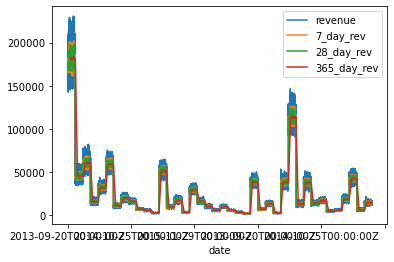

In [31]:
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

In [32]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

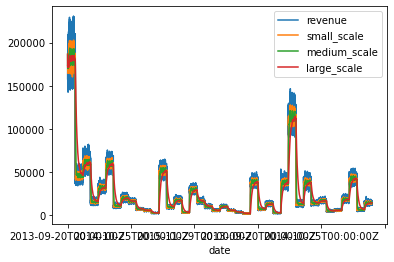

In [33]:
daily_revenue.plot(x = 'date', y =['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()

device                android               ios         
gender                 female     male   female     male
date                                                    
2013-09-21T00:00:00Z  10857.5  31765.7  14601.1  42658.4
2013-09-22T00:00:00Z   9487.0  30783.9  13244.3  41575.6
2013-09-23T00:00:00Z   9145.6  28967.6  12446.6  38534.9
2013-09-24T00:00:00Z  10159.5  30438.4  13592.7  40065.6
2013-09-25T00:00:00Z  11223.6  31554.5  13943.3  41924.6
...                       ...      ...      ...      ...
2016-12-27T00:00:00Z  10510.2  30793.3  13610.1  40236.1
2016-12-28T00:00:00Z  10237.6  32514.4  13944.1  42089.0
2016-12-29T00:00:00Z  11369.3  36105.1  14548.4  47104.8
2016-12-30T00:00:00Z  10860.7  33266.5  15523.1  43537.9
2016-12-31T00:00:00Z  10669.1  31882.4  14780.5  42607.9

[1198 rows x 4 columns]


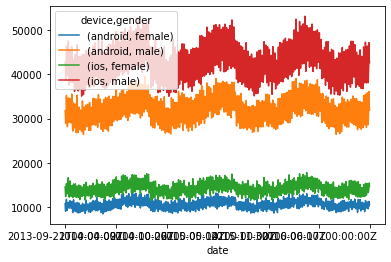

In [37]:
pivoted_data = pd.pivot_table(daily_revenue, values ='revenue', columns=['device', 'gender'], index='date')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]
print(pivoted_data)

pivoted_data.plot()
plt.show()

# Chapter 3: The Design and Application of A/B Testing


In [ ]:
# Extract the 'day'; value from the timestamp
purchase_data.date = purchase_data.date.dt.floor('d')

# Replace the NaN price values with 0 
purchase_data.price = np.where(np.isnan(purchase_data.price), 0, purchase_data.price)

# Aggregate the data by 'uid' & 'date'
purchase_data_agg = purchase_data.groupby(by=['uid', 'date'], as_index=False)
revenue_user_day = purchase_data_agg.sum()

# Calculate the final average
revenue_user_day = revenue_user_day.price.mean()
print(revenue_user_day)

In [ ]:
# Merge and group the datasets
purchase_data = demographics_data.merge(paywall_views,  how='inner', on=['uid'])
purchase_data.date = purchase_data.date.dt.floor('d')

# Group and aggregate our combined dataset 
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})

# Find the mean of each field and then multiply by 1000 to scale the result
daily_purchases = daily_purchase_data.purchase['sum'].mean()
daily_paywall_views = daily_purchase_data.purchase['count'].mean()
daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000

print(daily_purchases)
print(daily_paywall_views)

# CHAPTER4: Analyzing A/B Testing Results

In [5]:
import pandas as pd
ab_test_results = pd.read_csv("./data/ABTesting/ABTestingResults.csv")

In [6]:
# Compute and print the results
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 
print(results)

         uid
group       
GRP A  23009
GRP B  22874


In [7]:
# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

             uid
group           
GRP A  50.147113
GRP B  49.852887


In [8]:
# Find the unique users in each group 
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

                           uid
group device gender           
GRP A A      F       12.239827
             M       12.795589
      I      F       12.542772
             M       12.568925
GRP B A      F       12.553669
             M       12.499183
      I      F       12.283417
             M       12.516618


In [9]:
def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [ ]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.17, con_size=1000, test_size=1000)
print(p_value)

In [ ]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=100, test_size=100)
print(p_value)

In [ ]:
p_value = get_pvalue(con_conv=0.48, test_conv=0.50, con_size=1000, test_size=1000)
print(p_value)

In [ ]:
# Checking for statistical significance
# Compute the p-value

cont_conv = 0.09096495570387314
test_conv = 0.1020053238686779
cont_size = 5329
test_size = 5748

p_value = get_pvalue(cont_conv, test_conv, cont_size, test_size)
print(p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

In [ ]:
# Understanding confidence intervals
def get_ci(value, cl, sd):
  loc = sci.norm.ppf(1 - cl/2)
  rng_val = sci.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 

  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.975, 0.5)
print(confidence_interval)

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 2)
print(confidence_interval)

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(1, 0.95, 0.001)
print(confidence_interval)

In [ ]:
# Calculating confidence intervals


# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - cont_conv) * cont_conv / cont_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

In [ ]:
# Plotting the distribution


# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace(cont_conv - 3 * control_sd, cont_conv + 3 * control_sd, 100)
test_line = np.linspace(test_conv - 3 * test_sd, test_conv + 3 * test_sd, 100)

# Plot the distribution     
plt.plot(control_line, norm.pdf(control_line, cont_conv, control_sd))
plt.plot(test_line, norm.pdf(test_line, test_conv, test_sd))
plt.show()

In [ ]:
# Find the lift mean and standard deviation
lift_mean = test_conv - cont_conv
lift_sd = (test_var + cont_var) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Plot the lift distribution
plt.plot(lift_line, norm.pdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()